<h1>DSM140
NLP
Coursework</h1>

Student Number: RC0086
Assignment: Binary Text Classification

<h2>1. Introduction</h2>

In this notebook a model is created for a binary classification problem in order to understand if a headline is sarcastic or not. The full introduction is in the PDF report. 

<h2>2. Implementation</h2>

The main part of the report is done in this jupyter notebook. Where you can see the full implementation from analyzing and visualising the dataset to pre-processing the data and fitting the model. 

<h4>2.1 Importing the dataset 'Sarcasm_Headlines_Dataset.json'</h4>

Also first analysis of the overall structure and datatype is performedby calling the .head() and .describe() and .dtypes. 

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
path = './'
dataset_sarcastic = pd.read_json(path+ 'Sarcasm_Headlines_Dataset.json',lines=True)


import re
dataset_sarcastic['source'] = dataset_sarcastic['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])
dataset_sarcastic.head()

,article_link,headline,is_sarcastic,source
0,https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5,former versace store clerk sues over secret 'black code' for minority shoppers,0,huffingtonpost
1,https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0,huffingtonpost
2,https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697,mom starting to fear son's web series closest thing she will have to grandchild,1,theonion
3,https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1,theonion
4,https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb,j.k. rowling wishes snape happy birthday in the most magical way,0,huffingtonpost


In [3]:
dataset_sarcastic.describe()

,is_sarcastic
count,26709.000000
mean,0.438953
std,0.496269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [4]:
dataset_sarcastic.dtypes

article_link    object
headline        object
is_sarcastic     int64
source          object
dtype: object

<h4>2.2 Visualising the data</h4>

First we make sure that all packages are installed in order to performe the visualisations. Then, the variable dataset_issarcastic is created which shows how many headlines are actually sarcastic and a pie chart is created in order to show the distribution of sarcastic vs non sarcastic headlines in the dataset. 

In [5]:
!pip install plotly
!pip install cufflinks
!pip install chart-studio

In [6]:
from chart_studio import plotly
import numpy as np
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [7]:
dataset_issarcastic = dataset_sarcastic['is_sarcastic'].value_counts()
labels = ['Non-Sarcastic', 'Sarcastic']
sizes = (np.array((dataset_issarcastic / dataset_issarcastic.sum())*100))
colors = ['blue', 'green']

trace = go.Pie(labels=labels, values=sizes, opacity = 0.8, hoverinfo='label+percent',
               marker=dict(colors=colors, line=dict(color='red', width=2)))
layout = go.Layout(
    title='Sarcastic Vs Non-Sarcastic'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename="Sa_NonSa")

<h4>2.3 Taking a look at the most frequent words</h4>

Due to this being a NLP problem it is from utmost importance to understand the word distribution as well. For this reason a variable "all_words" is created that by calling .split and .value_counts holds the frequencies for the words. Finally, a bar chart is created with the word distribution which shows the word count of the most frequent words.

In [8]:
all_words = dataset_sarcastic['headline'].str.split(expand=True).unstack().value_counts()

data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Viridis',
                         color = all_words.values[2:100]
                        ),
            text='words'
    )]

layout = go.Layout(
    title='Word distribution (most frequent)'
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='basic-bar')

<h4>2.4 Tokenization</h4>

It is obvious that the most common words are mostly joining words, thus we will need to break up the text to performe more processing in order to clean up the data for the model. Tokenization is the process of breaking up the given text into units called tokens. The tokens may be words or number or punctuation mark. Tokenization does this task by locating word boundaries. Ending point of a word and beginning of the next word is called word boundaries. Tokenization is also known as word segmentation. For that two new variables are created, called sarcasm_true and sarcasm_false that include sarcastic and non sarcastic headlines respectively. Then, the headlines are tokenized and saved in a list called sarcasm_news and nonsarcasm_news. Finally both are converted into a single list for sarcasm and non sarcasm.

In [9]:
import itertools

sarcasm_true = dataset_sarcastic[dataset_sarcastic.is_sarcastic==1]
sarcasm_true.reset_index(drop=True, inplace=True)
sarcasm_false = dataset_sarcastic[dataset_sarcastic.is_sarcastic==0]
sarcasm_false.reset_index(drop=True, inplace=True)


# Tokenizing 

sarcasm_news = []
for rows in range(0, sarcasm_true.shape[0]):
    head_txt = sarcasm_true.headline[rows]
    head_txt = head_txt.split(" ")
    sarcasm_news.append(head_txt)

nonsarcasm_news = []
for rows in range(0, sarcasm_false.shape[0]):
    head_txt = sarcasm_false.headline[rows]
    head_txt = head_txt.split(" ")
    nonsarcasm_news.append(head_txt)
    
#Converting to single ist

sarcasm_list = list(itertools.chain(*sarcasm_news))

nonsarcasm_list = list(itertools.chain(*nonsarcasm_news))


In [10]:
nonsarcasm_list

['former',
 'versace',
 'store',
 'clerk',
 'sues',
 'over',
 'secret',
 "'black",
 "code'",
 'for',
 'minority',
 'shoppers',
 'the',
 "'roseanne'",
 'revival',
 'catches',
 'up',
 'to',
 'our',
 'thorny',
 'political',
 'mood,',
 'for',
 'better',
 'and',
 'worse',
 'j.k.',
 'rowling',
 'wishes',
 'snape',
 'happy',
 'birthday',
 'in',
 'the',
 'most',
 'magical',
 'way',
 'advancing',
 'the',
 "world's",
 'women',
 'the',
 'fascinating',
 'case',
 'for',
 'eating',
 'lab-grown',
 'meat',
 'this',
 'ceo',
 'will',
 'send',
 'your',
 'kids',
 'to',
 'school,',
 'if',
 'you',
 'work',
 'for',
 'his',
 'company',
 "friday's",
 'morning',
 'email:',
 'inside',
 "trump's",
 'presser',
 'for',
 'the',
 'ages',
 'airline',
 'passengers',
 'tackle',
 'man',
 'who',
 'rushes',
 'cockpit',
 'in',
 'bomb',
 'threat',
 'facebook',
 'reportedly',
 'working',
 'on',
 'healthcare',
 'features',
 'and',
 'apps',
 'north',
 'korea',
 'praises',
 'trump',
 'and',
 'urges',
 'us',
 'voters',
 'to',
 'r

<h4>2.5 Cleaning the lists with the stopword corpus</h4>

After we created the tokenized lists the stopwords need to be removed. In order to do that there is already a predefined corpus in the nltk library. If you do not have it, do not forget to install the nltk package first. Then, a simple list comprehension is created to match the stopwords against the previously created lists. 

In [11]:
!pip install nltk

In [12]:
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')
sar_list = [word for word in sarcasm_list if word.lower() not in stopwords]
nonsarc_list = [word for word in nonsarcasm_list if word.lower() not in stopwords]

print(len(sarcasm_list),len(sar_list))
print(len(nonsarcasm_list),len(nonsarc_list))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


115898 87458
147128 103525


<h4>2.5 Lemmatisation & wordlcloud generation without stopwords</h4>

One can see that the stopwords were deleted and the amount of words reduced by a significant amount. Now the different forms of same words must be grouped together so they can be analysed as a single item. Basically, the are being transformed into the words lemma, meaning dictionary form. The desicion for lemmatisation over stemming was done because the meaning might be very important to analyze sarcasm. Unlike with stemming, in lemmatizing the dataset will not change the word, but rather transform it to its actual lemma, preserving the meaning. For that we use another nltk corpus called "wordnet". Finally, in order to see if lemmatisation and the stopword reduction worked, two wordclouds are generated for sarcastic and non-sarcastic headlines. 

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()


In [33]:
#Sarcasm headline after Lemmatization
sarcasm_lem = []
for batch in sarcasm_news:
    sar_list = [word for word in batch if word.lower() not in stopwords]
    lemm = WordNetLemmatizer()
    sar_list_lemm = [lemm.lemmatize(word) for word in sar_list]
    sarcasm_lem.append(sar_list_lemm)
    
#Sarcasm headline after Lemmatization
nonsarcasm_lem = []
for batch in sarcasm_news:
    nonsar_list = [word for word in batch if word.lower() not in stopwords]
    lemm = WordNetLemmatizer()
    nonsar_list_lemm = [lemm.lemmatize(word) for word in sar_list]
    nonsarcasm_lem.append(nonsar_list_lemm)

In [34]:
print(sarcasm_lem)


[['mom', 'starting', 'fear', "son's", 'web', 'series', 'closest', 'thing', 'grandchild'], ['boehner', 'want', 'wife', 'listen,', 'come', 'alternative', 'debt-reduction', 'idea'], ['top', 'snake', 'handler', 'leaf', 'sinking', 'huckabee', 'campaign'], ['nuclear', 'bomb', 'detonates', 'rehearsal', "'spider-man'", 'musical'], ['cosby', 'lawyer', 'asks', 'accuser', 'come', 'forward', 'smeared', 'legal', 'team', 'year', 'ago'], ['stock', 'analyst', 'confused,', 'frightened', 'boar', 'market'], ['courtroom', 'sketch', 'artist', 'clear', 'manga', 'influence'], ['trump', 'assures', 'nation', 'decision', 'syrian', 'airstrikes', 'came', 'carefully', 'considering', 'passing', 'whim'], ['ex-con', 'back', 'behind', 'bar'], ['careful', 'consideration,', 'bush', 'recommends', 'oil', 'drilling'], ['giant', 'altoid', 'heading', 'toward', 'earth'], ['robin', 'williams', 'inflicted', 'holiday', 'moviegoer', 'eighth', 'straight', 'year'], ['rescuer', 'heroically', 'help', 'beached', 'garbage', 'back', 'oc

In [35]:
print(nonsarcasm_lem)

[['pope', 'francis', 'wearing', 'sweater', 'vestment', 'got', 'christmas'], ['pope', 'francis', 'wearing', 'sweater', 'vestment', 'got', 'christmas'], ['pope', 'francis', 'wearing', 'sweater', 'vestment', 'got', 'christmas'], ['pope', 'francis', 'wearing', 'sweater', 'vestment', 'got', 'christmas'], ['pope', 'francis', 'wearing', 'sweater', 'vestment', 'got', 'christmas'], ['pope', 'francis', 'wearing', 'sweater', 'vestment', 'got', 'christmas'], ['pope', 'francis', 'wearing', 'sweater', 'vestment', 'got', 'christmas'], ['pope', 'francis', 'wearing', 'sweater', 'vestment', 'got', 'christmas'], ['pope', 'francis', 'wearing', 'sweater', 'vestment', 'got', 'christmas'], ['pope', 'francis', 'wearing', 'sweater', 'vestment', 'got', 'christmas'], ['pope', 'francis', 'wearing', 'sweater', 'vestment', 'got', 'christmas'], ['pope', 'francis', 'wearing', 'sweater', 'vestment', 'got', 'christmas'], ['pope', 'francis', 'wearing', 'sweater', 'vestment', 'got', 'christmas'], ['pope', 'francis', 'wea

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

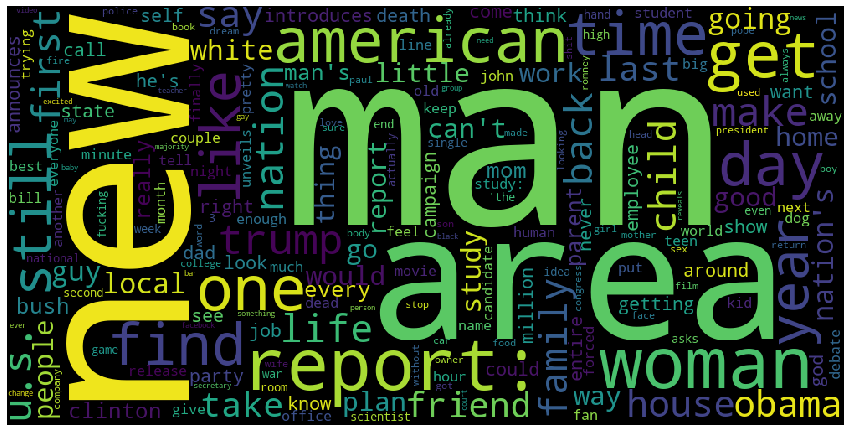

In [32]:
from collections import Counter

sarcasm_list_finished = list(itertools.chain(*sarcasm_lem))

word_could_dict=Counter(sarcasm_list_finished)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

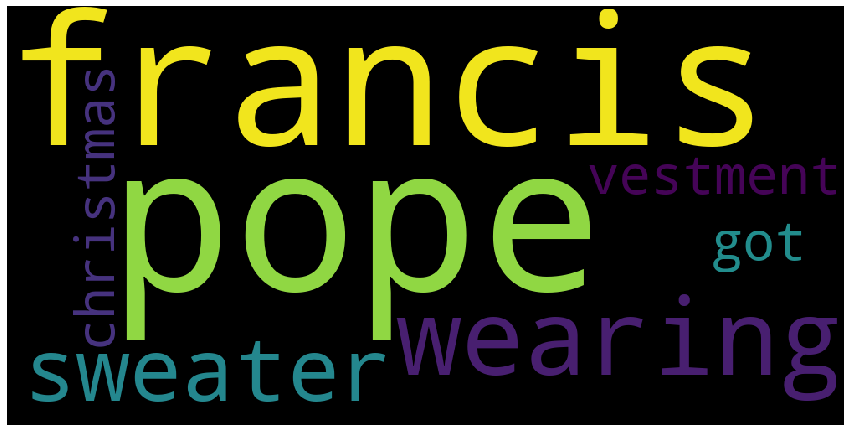

In [36]:
from collections import Counter

nonsarcasm_list_finished = list(itertools.chain(*nonsarcasm_lem))

word_could_dict=Counter(nonsarcasm_list_finished)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<h4>2.7 Model Building</h4>

<h5>2.7.1 Data preparation</h5>
First we need to prepare the data. The input (x) and output (y) vectors need to be created and the labels preprocessed.

In [38]:
from sklearn.preprocessing import LabelEncoder
X = dataset_sarcastic.headline
Y = dataset_sarcastic.is_sarcastic
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

<h5>2.7.2 Split Data (Training & Test)</h5>
Now the dataset needs to be split into a training set and a holdout test set, on which the trained model will be evaluated. Also, check if keras and tensorflow is installed. 

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [40]:
!pip install keras

In [41]:
!pip install tensorflow

<h5>2.7.3 More Processing</h5>
Now the data needs to be tokenized and put into sequences. Also padding is added to ensure that the sequences have the same shape. For the length a standard value of 150 is chosen. 

In [42]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

<h5>2.7.4 Creating, Training and Testing the Model</h5>

In [43]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.models import Model
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [44]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [49]:
from keras.callbacks import EarlyStopping
model.fit(sequences_matrix,Y_train,batch_size=100,epochs=5,
          validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/5
193/193 [==============================] - 21s 110ms/step - loss: 0.3618 - accuracy: 0.8382 - val_loss: 0.3565 - val_accuracy: 0.8348
Epoch 2/5
193/193 [==============================] - 21s 110ms/step - loss: 0.3459 - accuracy: 0.8476 - val_loss: 0.3546 - val_accuracy: 0.8348


In [50]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

<h2>3. Evaluation</h2>

Finally, the model is evaluated against the test set. The conclusion can be read in the accompanied report. 

In [51]:
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

167/167 [==============================] - 3s 19ms/step - loss: 0.3961 - accuracy: 0.8231
Test set
  Loss: 0.396
  Accuracy: 0.823
